<a href="https://colab.research.google.com/github/jacksonwiese/ml-hospital-diagnosis-data/blob/main/ml_hospital_diagnosis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Python pulling libraries
import numpy as np #used for arrays and matrices (both high level and low level)
import pandas as pd #used for data structures and data anaylsis
import matplotlib.pyplot as plt #
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
#create a variable ad assign a list to it
df = pd.read_csv("magic04.data", names=cols) #calls upon pandas, read_csv and put into a dataframe (table they don't all have to be the same data type)
#names=cols assign a label to the list 
#df for data frame (no significance otherwise)
df.head() #shoes the first 5 reconds in the data frame
df.tail()

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h

In [ ]:
df["class"] = (df["class"] == "g").astype(int)
#nominal data has no apparant order
#ordinal data has apparent order

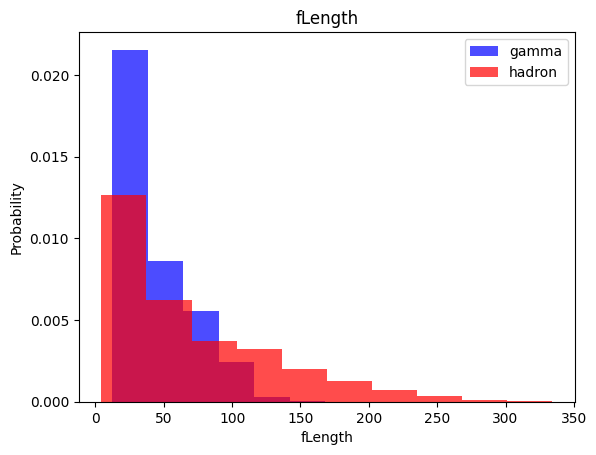

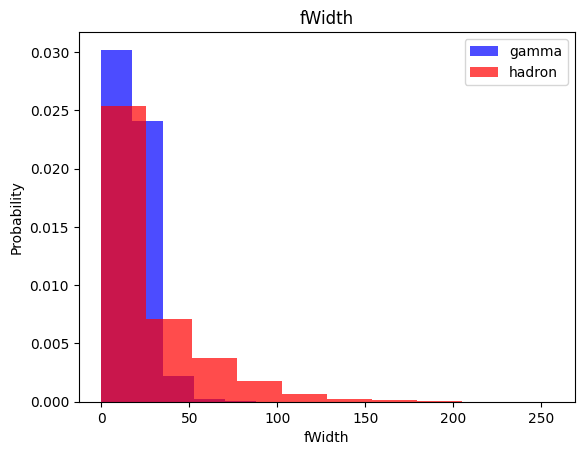

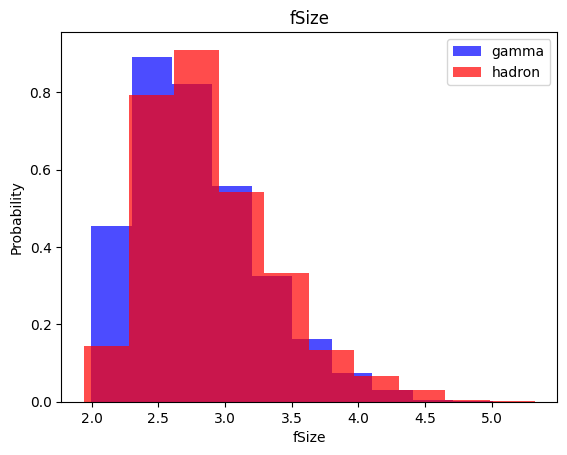

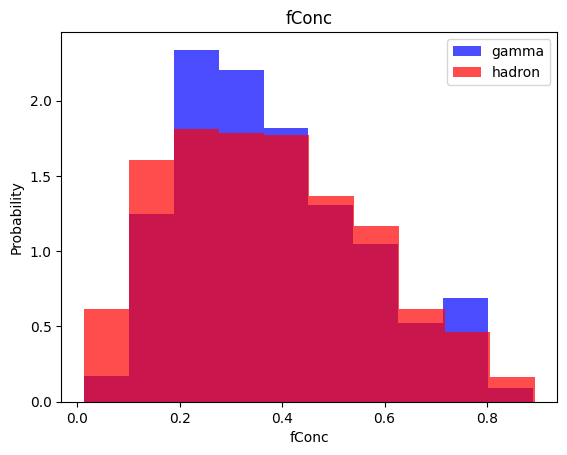

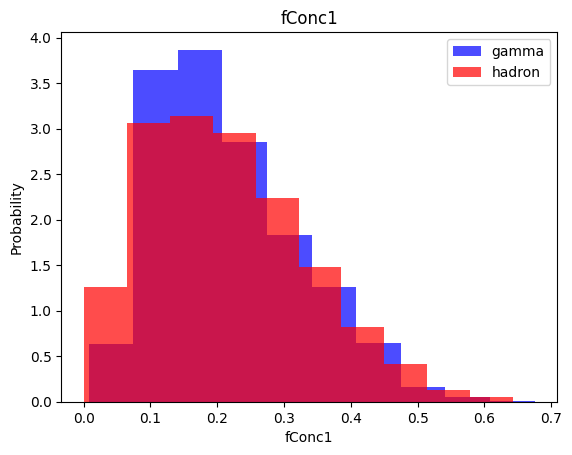

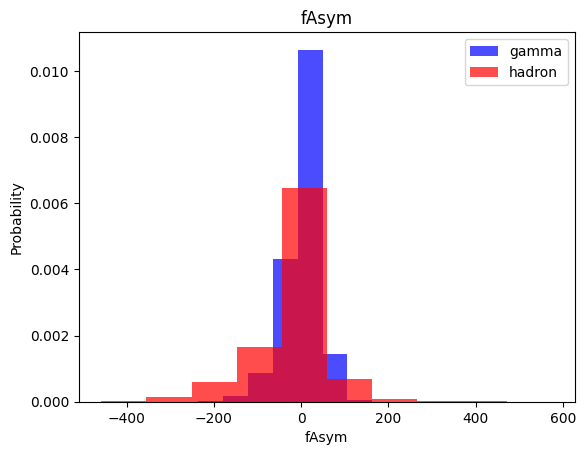

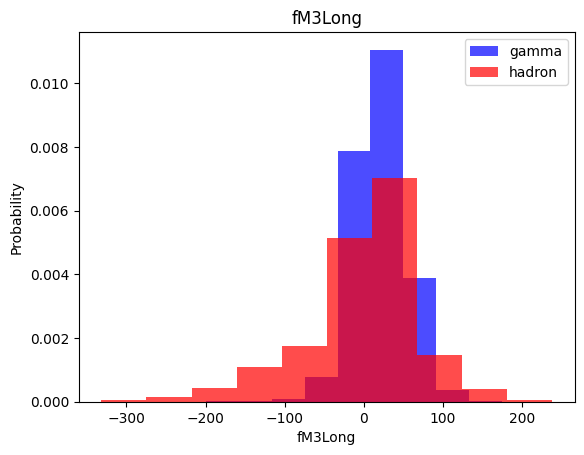

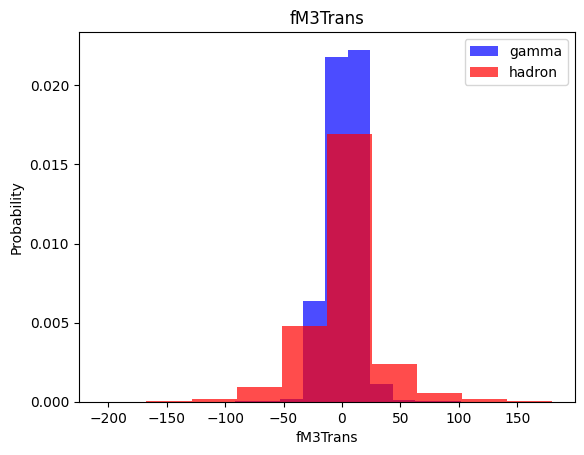

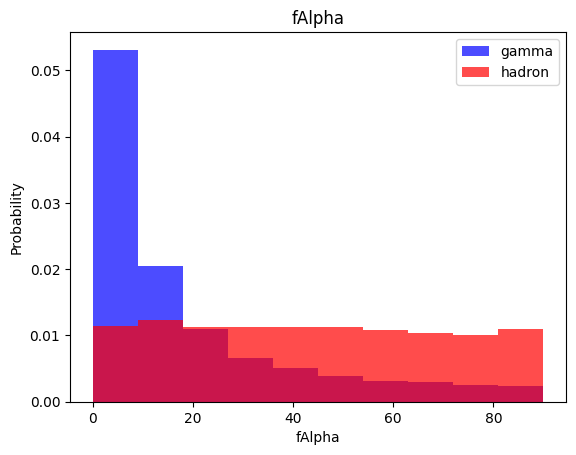

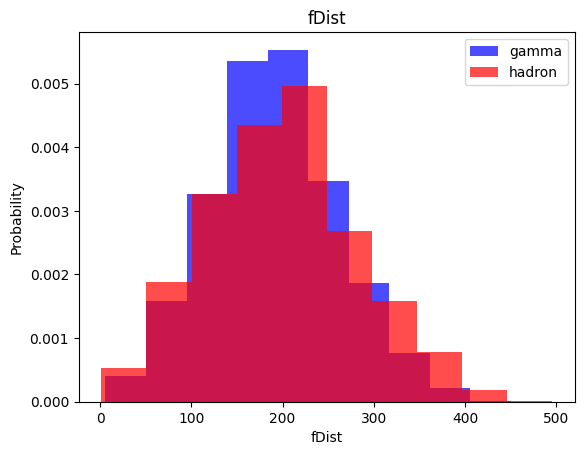

In [ ]:
#for loop runs multiple code for every category in df
for label in cols[:-1]: 
  #histogram is a frequency distribution graph
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True) 
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)  
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#the overlay shows that some features have more/less differences on whether prediction should be gamma or hadron

Train, validation, and test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#split method in numpy splits data
#function button in Colab
#multiple array assignment in one line of code
#splitiing data set 
#train is 60% of the data frame
#data from 60% to 80% is assigned to valid

In [ ]:
def scale_dataset(dataframe, oversample=False):
  #split the dataframe into a feature matrix (X) and target vector (y), capital for MATRIX and lowercase for vector
  #only wanted to scale the feature matix (because it's comparing two things with different units)
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  #scale the feature matrix (X)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  
  #the reason we oversample, is trying to avoid sampling bias
  #way more hadrons than gammas, so makes the ven so model has no bias
  if oversample: 
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  #stick the scaled and (potentially) oversampled feature matrix and target vector back together into a new dataframe
  #reshape basiclaly made y into 2D array, which is the same data but now 2D
  data = np.hstack((X, np.reshape(y, (-1, 1))))

  #return the scaled and (potentially) oversampled datafram, feature atrix, and target vector --> 
  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True) #scaling and oversampling our traning data
valid, X_valid, y_valid = scale_dataset(valid, oversample=False) #scaling (but not oversampling) our validation data
test, X_test, y_test = scale_dataset(test, oversample=False) #scaling (but not oversampling) our test data
#ALOT OF THE WORK: is preparing data to run the anaylsis to use into a machine learning model

# Class 2/8


K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3) #changes the number of neighbors
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test) #used the test dataset

In [ ]:
print(classification_report(y_test, y_pred)) 
#AT n_neighbors=1
#accurracy is 81%
#precision and recall for hadron (0) is pretty low at 76% and 68
#f1-score is combo of precision and recall

#increasing n_neighbors to 5


              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1294
           1       0.87      0.84      0.86      2510

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB #Guassian is the most popular, 
#the likelohood of features is assumed to be Gaussian (aka a normal distribution)

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test) #used the test dataset
print(classification_report(y_test, y_pred)) 
#accuracy is 73% which is worse than k-nearest neighbors
#lower accuracy likely because we're assuing the features are independent


              precision    recall  f1-score   support

           0       0.68      0.45      0.54      1294
           1       0.76      0.89      0.82      2510

    accuracy                           0.74      3804
   macro avg       0.72      0.67      0.68      3804
weighted avg       0.73      0.74      0.72      3804



# Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test) #used the test dataset
print(classification_report(y_test, y_pred)) 
#preformed better than naive bayes but still not as good as KKN

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1294
           1       0.85      0.81      0.83      2510

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test) #used the test dataset
print(classification_report(y_test, y_pred)) 
#this one was the best so far

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1294
           1       0.90      0.89      0.89      2510

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch') #Epochs means training history
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Binary Crossentropy')
  ax2.grid(True)

  plt.show()

In [ ]:
#new model
#layer all thje things we're passing in as sequential
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob), #doesn't train certain nodes to prevent overfitting
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob), #second dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
  
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


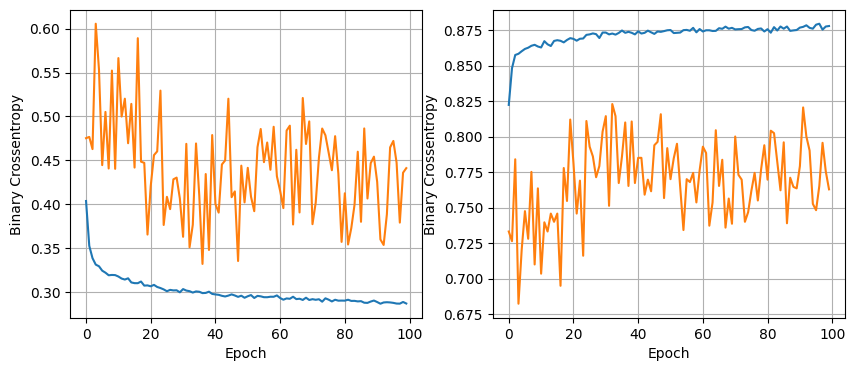

119/119 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8741
16 nodes, dropout 0, lr 0.01, batch size 64


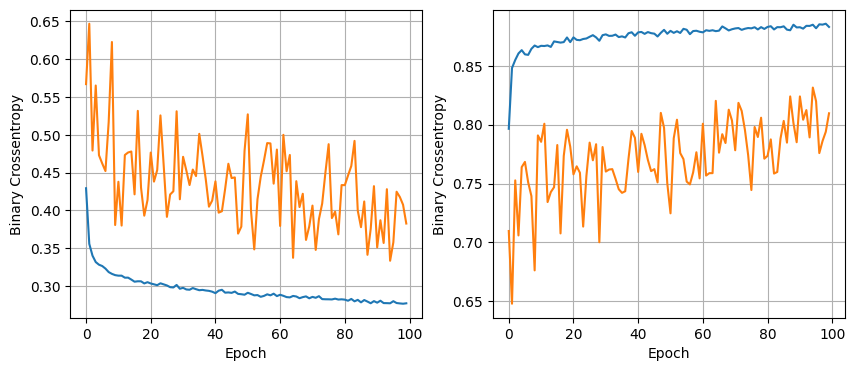

119/119 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8717
16 nodes, dropout 0, lr 0.01, batch size 128


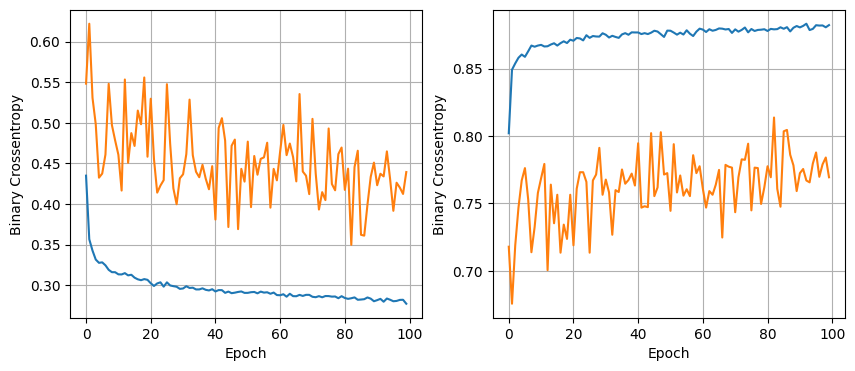

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8751
16 nodes, dropout 0, lr 0.005, batch size 32


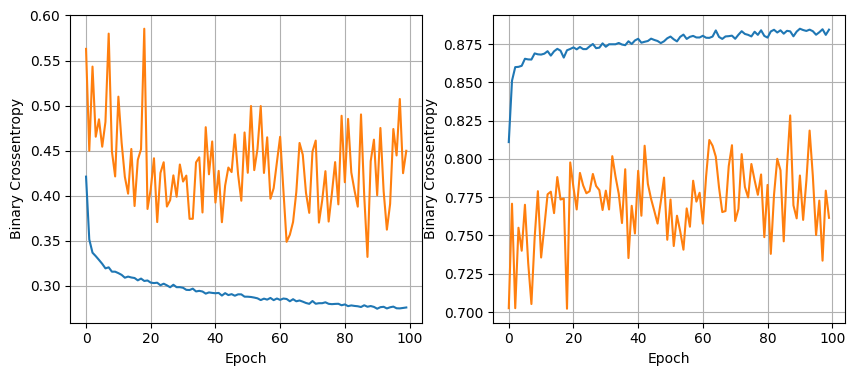

119/119 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8751
16 nodes, dropout 0, lr 0.005, batch size 64


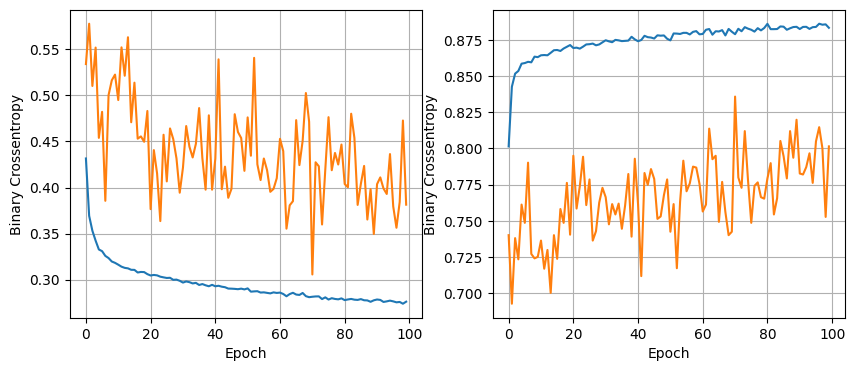

119/119 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8754
16 nodes, dropout 0, lr 0.005, batch size 128


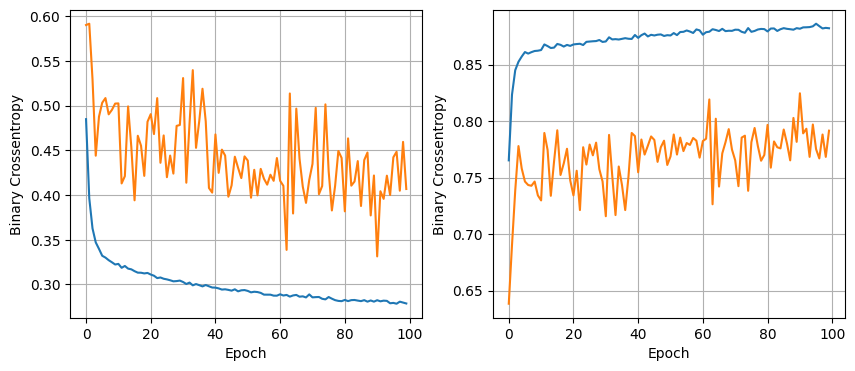

119/119 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.001, batch size 32


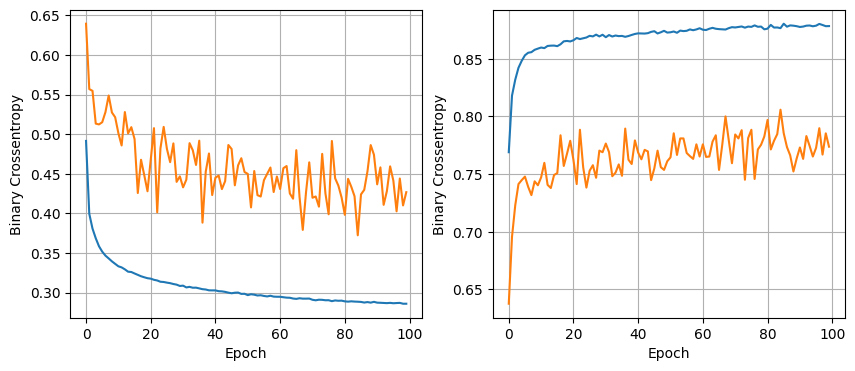

119/119 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8770
16 nodes, dropout 0, lr 0.001, batch size 64


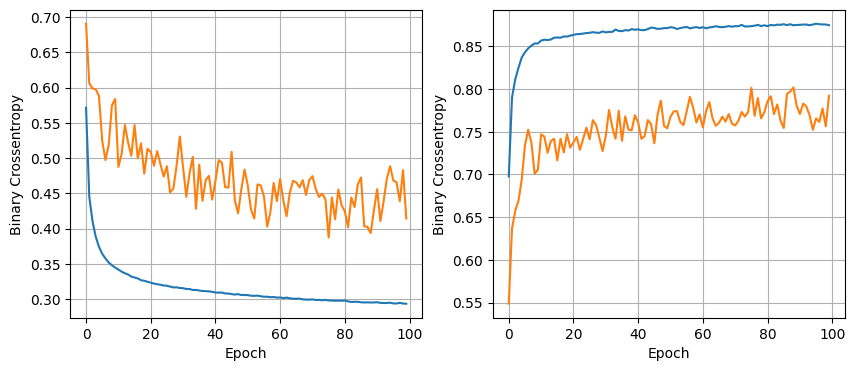

119/119 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8725
16 nodes, dropout 0, lr 0.001, batch size 128


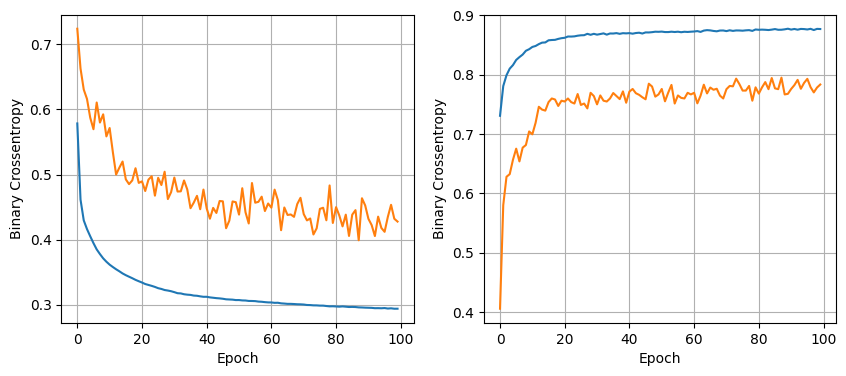

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8728
16 nodes, dropout 0.2, lr 0.01, batch size 32


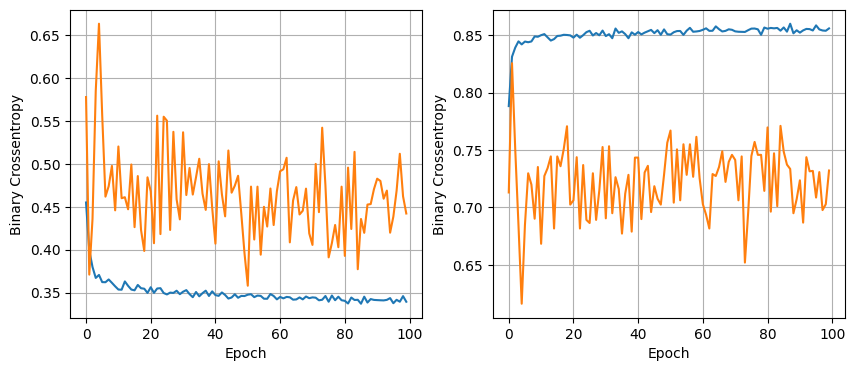

119/119 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8722
16 nodes, dropout 0.2, lr 0.01, batch size 64


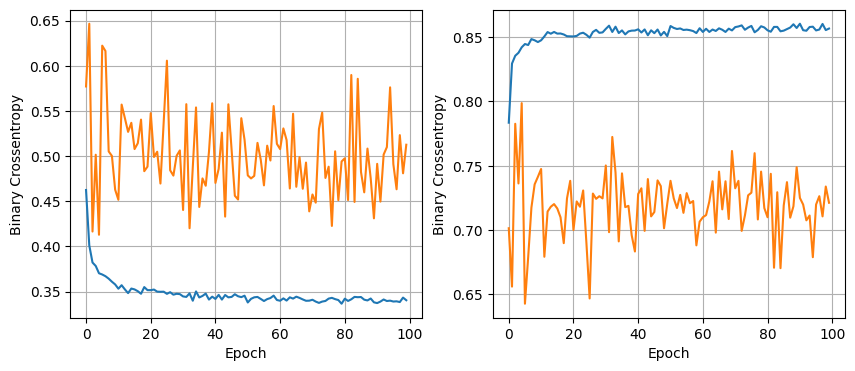

119/119 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.01, batch size 128


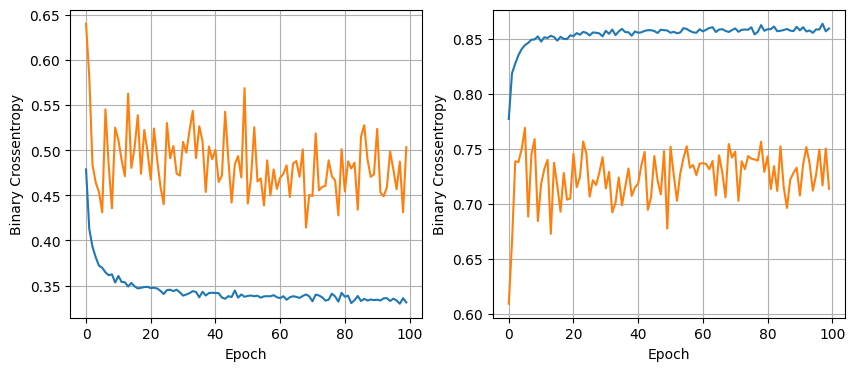

119/119 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8728
16 nodes, dropout 0.2, lr 0.005, batch size 32


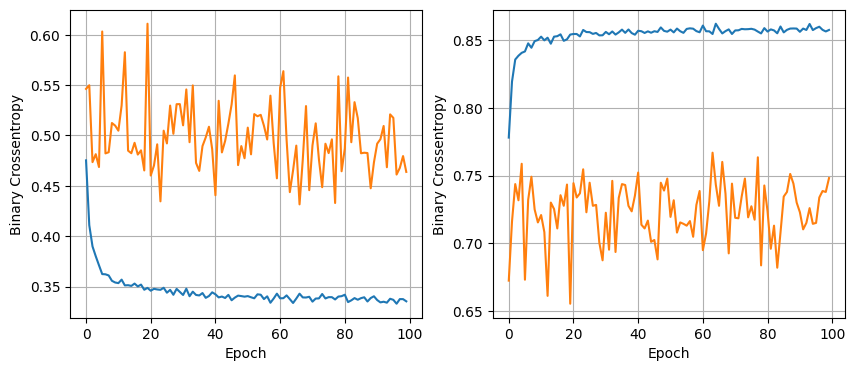

119/119 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.005, batch size 64


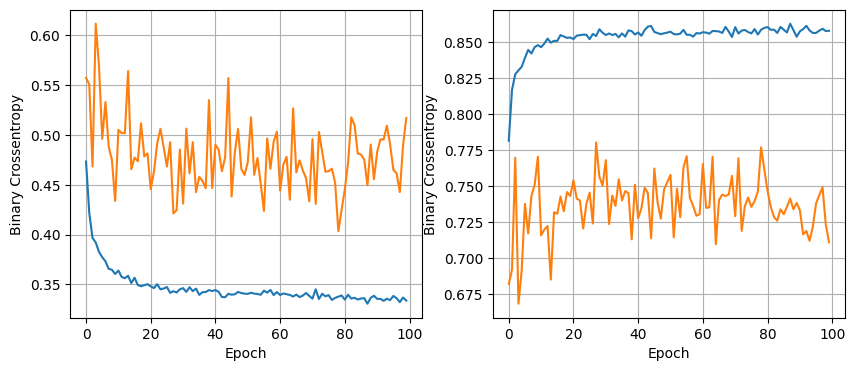

119/119 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.005, batch size 128


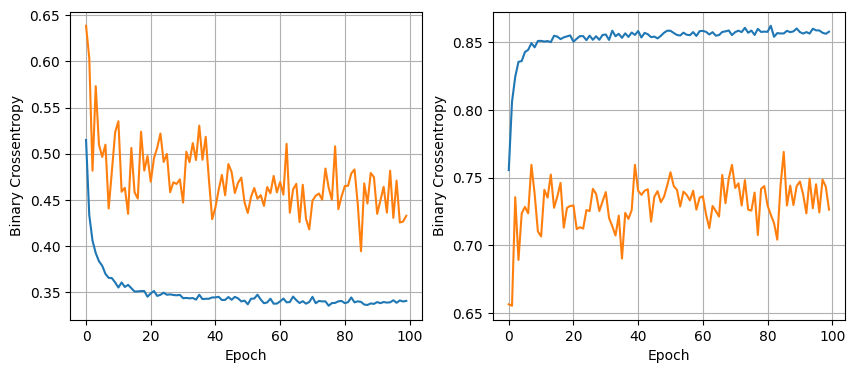

119/119 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8728
16 nodes, dropout 0.2, lr 0.001, batch size 32


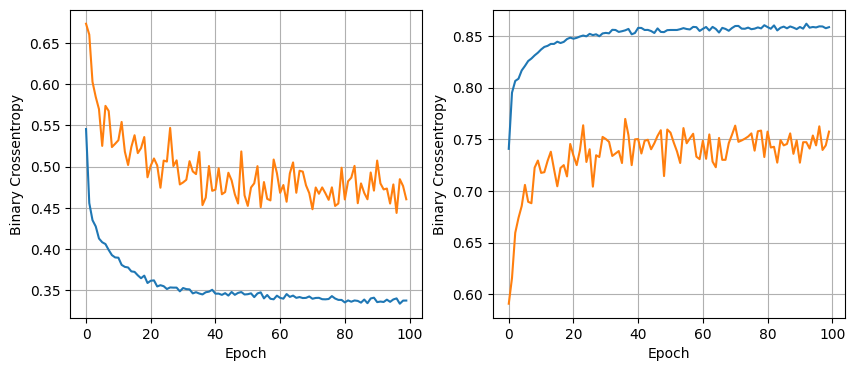

119/119 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8717
16 nodes, dropout 0.2, lr 0.001, batch size 64


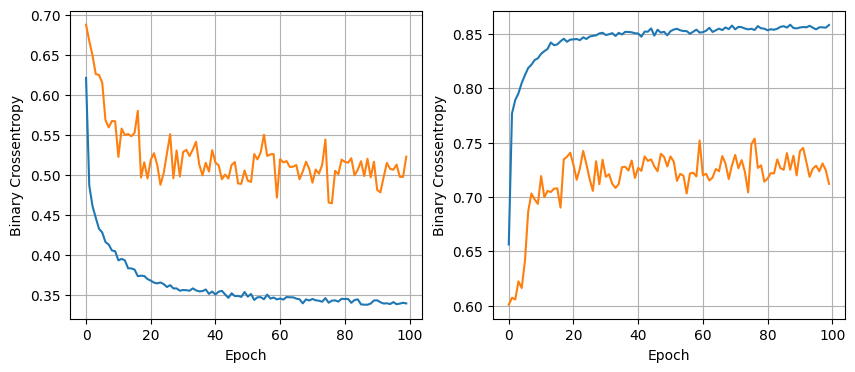

119/119 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.8733
16 nodes, dropout 0.2, lr 0.001, batch size 128


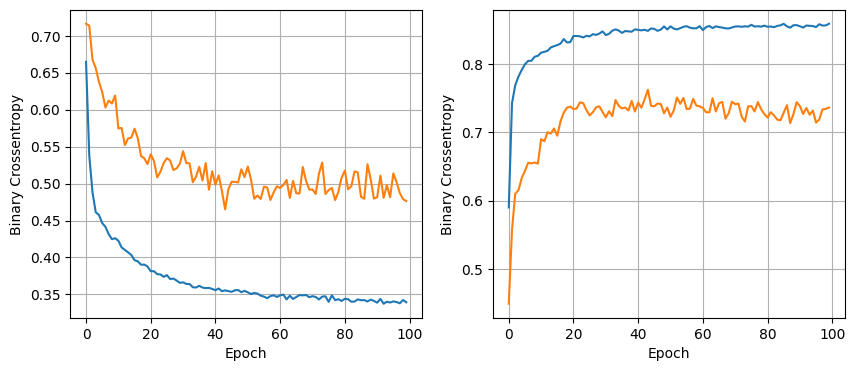

119/119 [==============================] - 0s 3ms/step - loss: 0.3046 - accuracy: 0.8717
32 nodes, dropout 0, lr 0.01, batch size 32


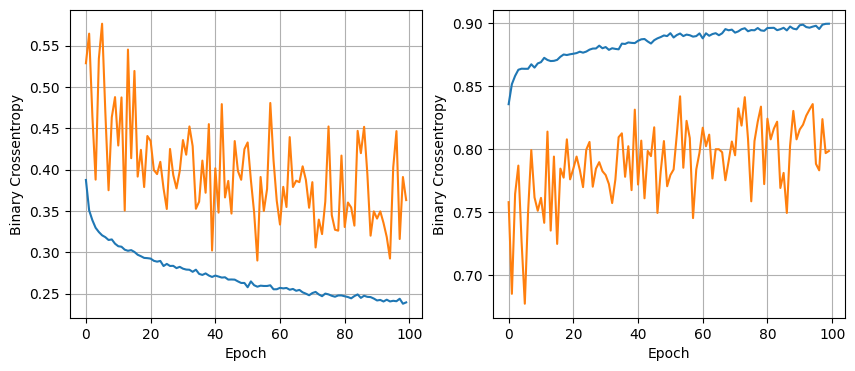

119/119 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8704
32 nodes, dropout 0, lr 0.01, batch size 64


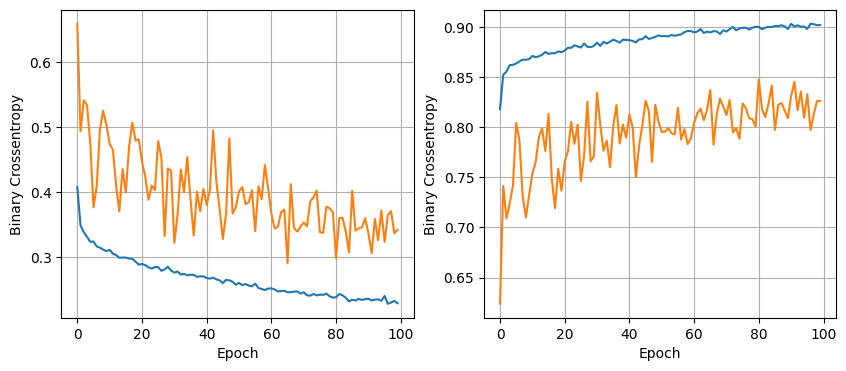

119/119 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8704
32 nodes, dropout 0, lr 0.01, batch size 128


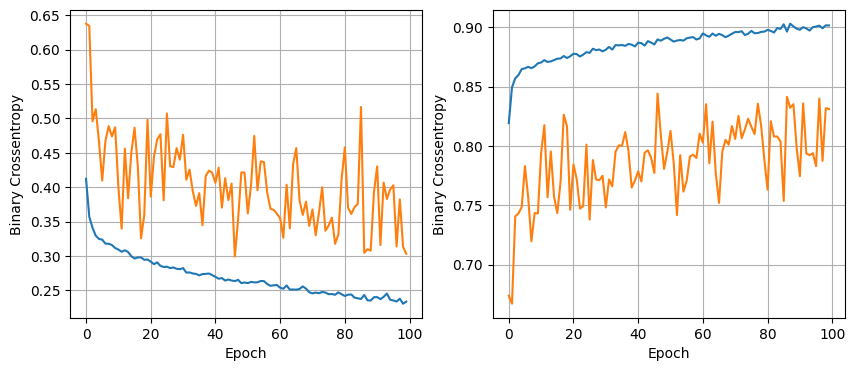

119/119 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.005, batch size 32


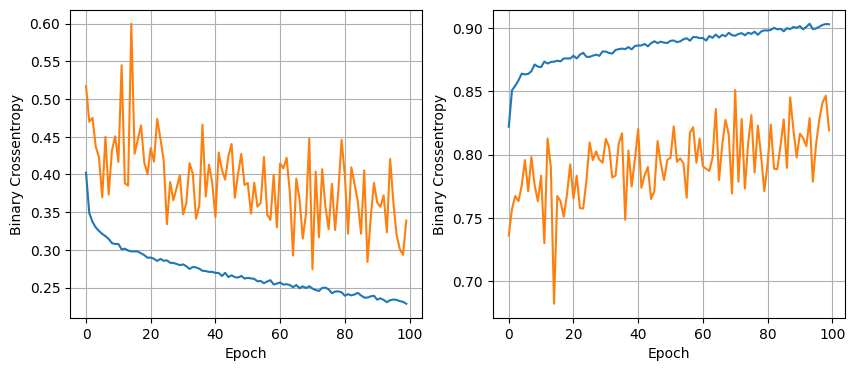

119/119 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8625
32 nodes, dropout 0, lr 0.005, batch size 64


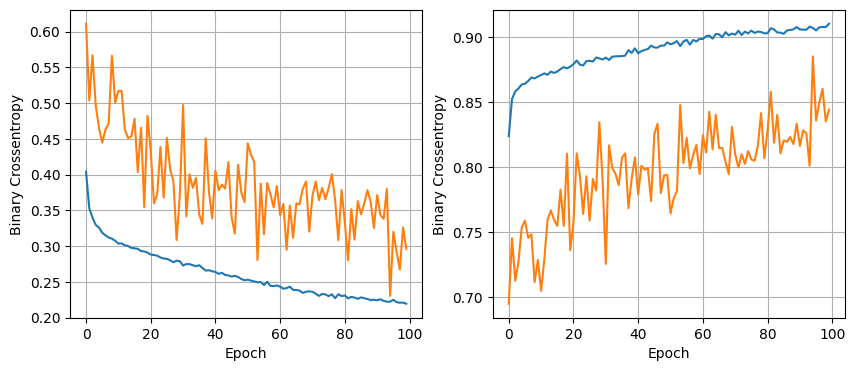

119/119 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8722
32 nodes, dropout 0, lr 0.005, batch size 128


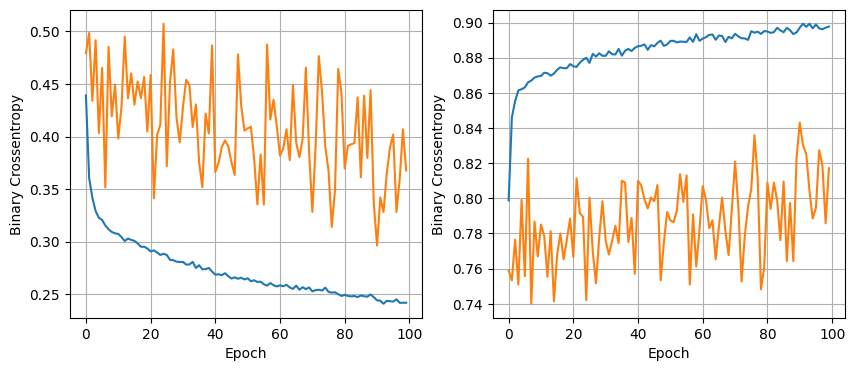

119/119 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.001, batch size 32


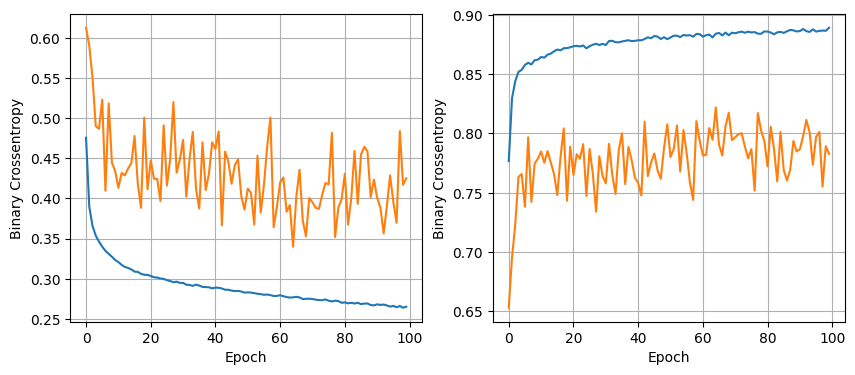

119/119 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8799
32 nodes, dropout 0, lr 0.001, batch size 64


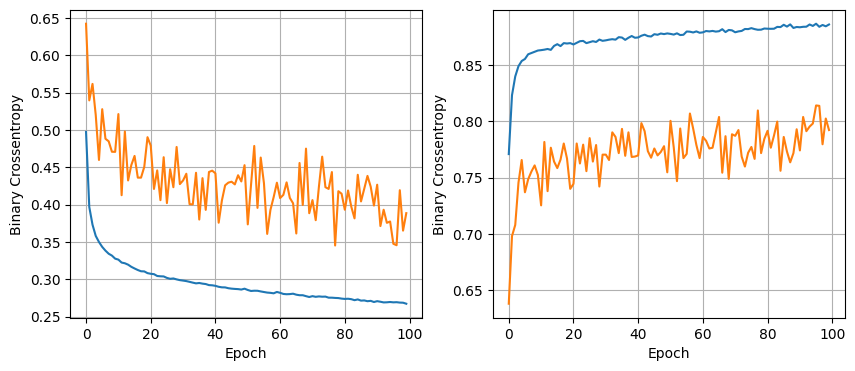

119/119 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8751
32 nodes, dropout 0, lr 0.001, batch size 128


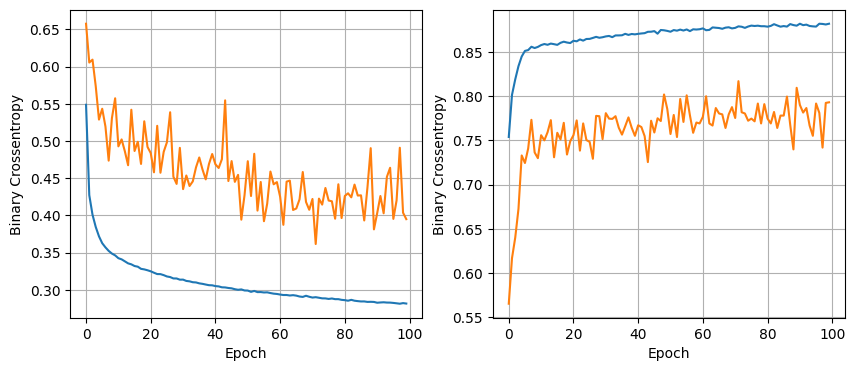

119/119 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8672
32 nodes, dropout 0.2, lr 0.01, batch size 32


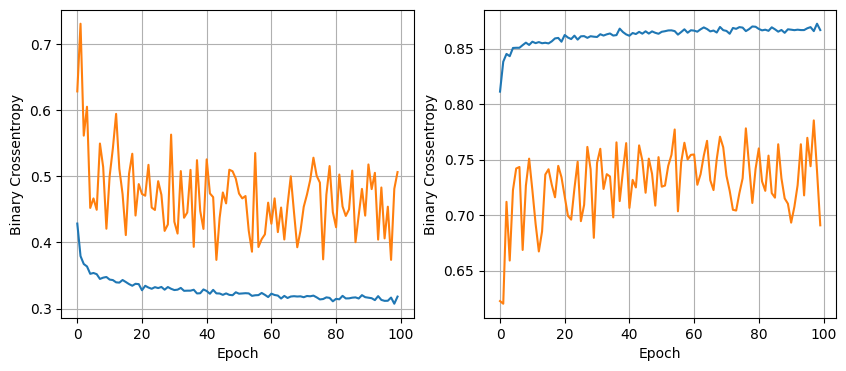

119/119 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8665
32 nodes, dropout 0.2, lr 0.01, batch size 64


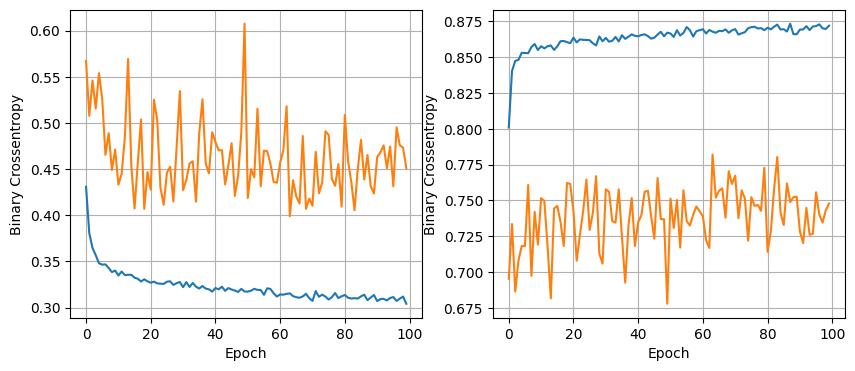

119/119 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8751
32 nodes, dropout 0.2, lr 0.01, batch size 128


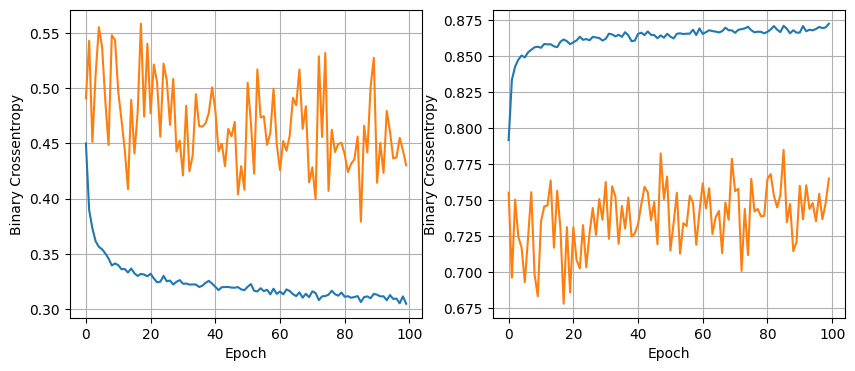

119/119 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.005, batch size 32


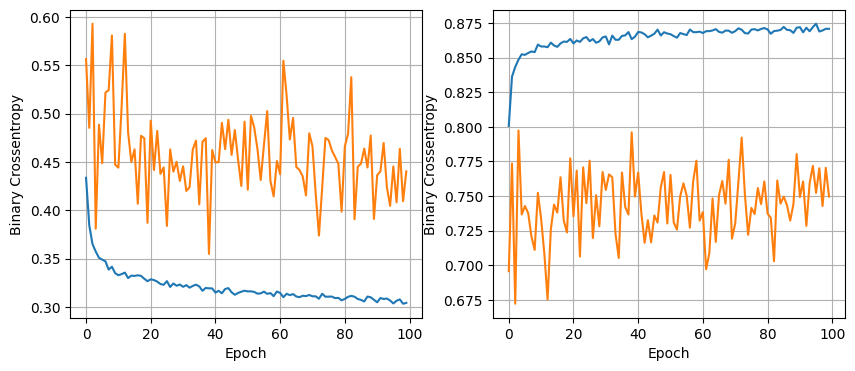

119/119 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.8757
32 nodes, dropout 0.2, lr 0.005, batch size 64


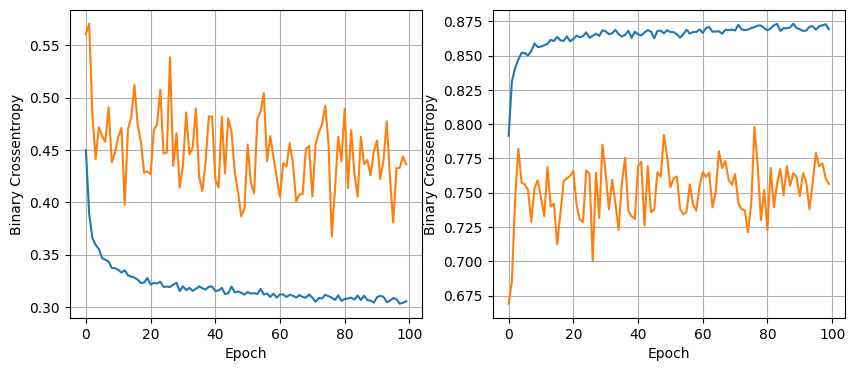

119/119 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8767
32 nodes, dropout 0.2, lr 0.005, batch size 128


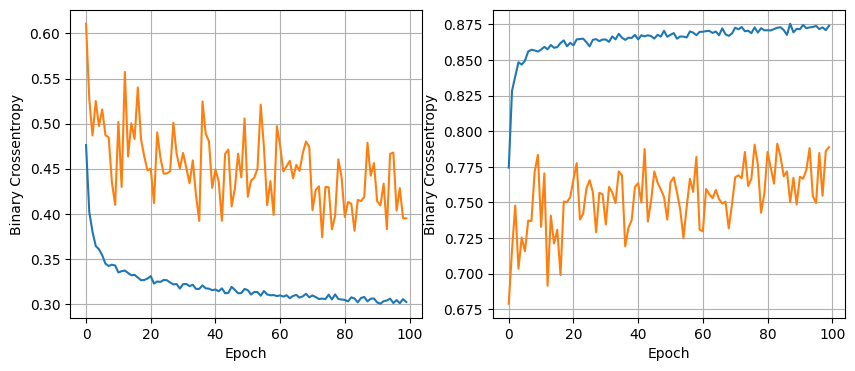

119/119 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.8796
32 nodes, dropout 0.2, lr 0.001, batch size 32


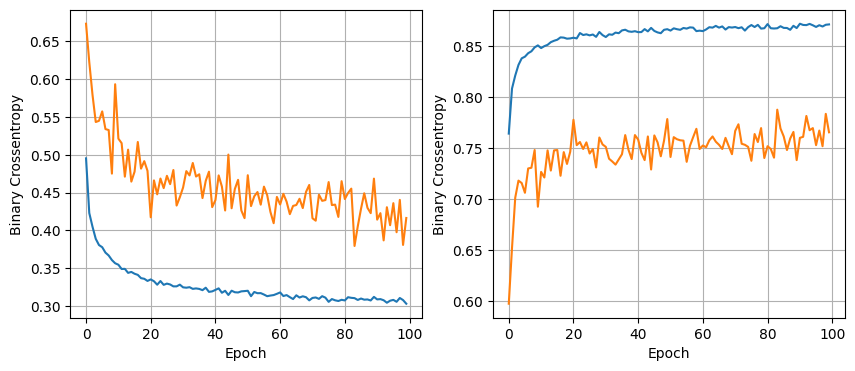

119/119 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8780
32 nodes, dropout 0.2, lr 0.001, batch size 64


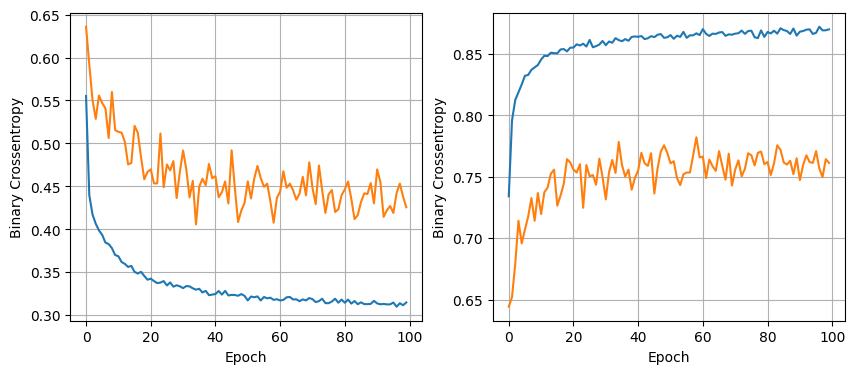

119/119 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8791
32 nodes, dropout 0.2, lr 0.001, batch size 128


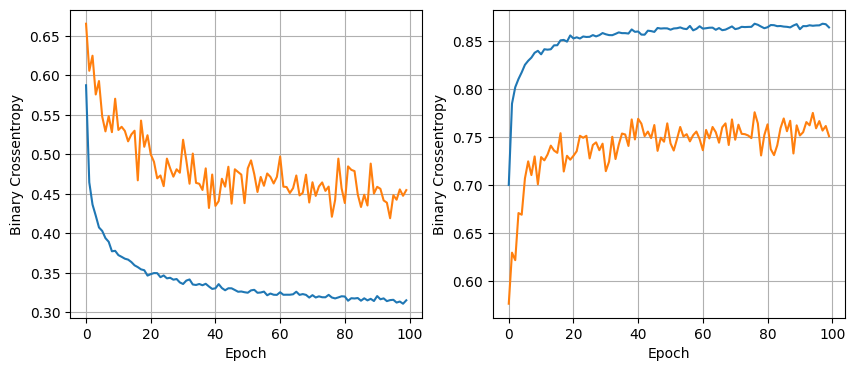

119/119 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8767
64 nodes, dropout 0, lr 0.01, batch size 32


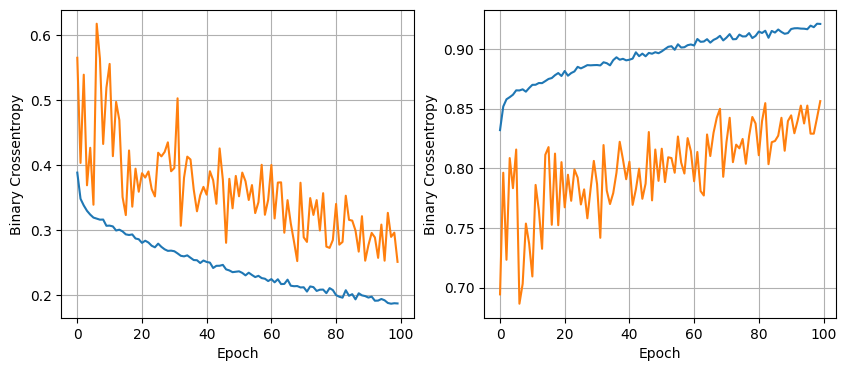

119/119 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.8675
64 nodes, dropout 0, lr 0.01, batch size 64


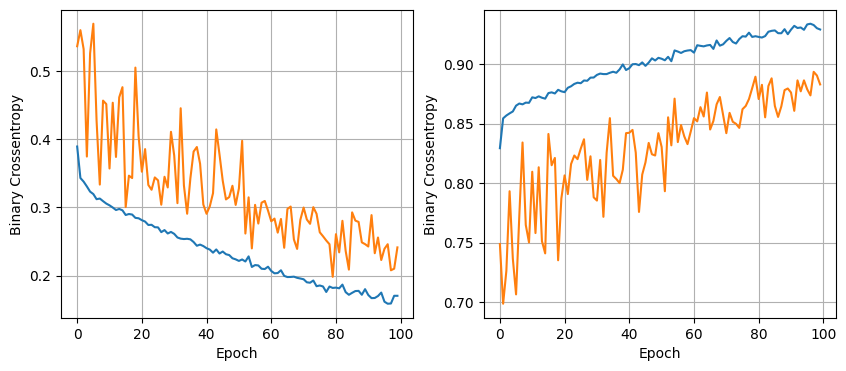

119/119 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.8502
64 nodes, dropout 0, lr 0.01, batch size 128


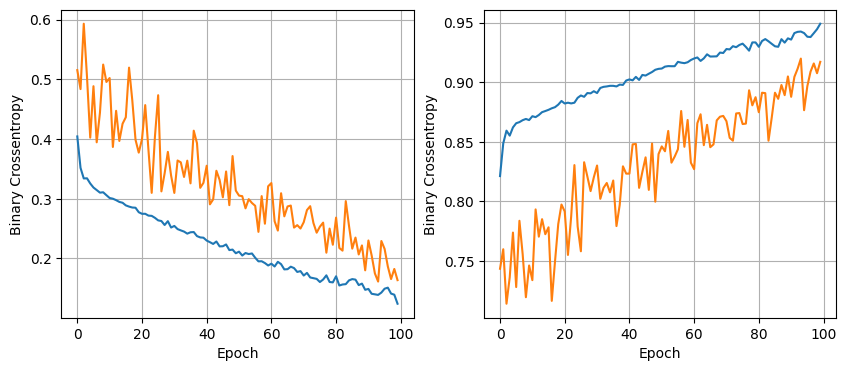

119/119 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.8565
64 nodes, dropout 0, lr 0.005, batch size 32


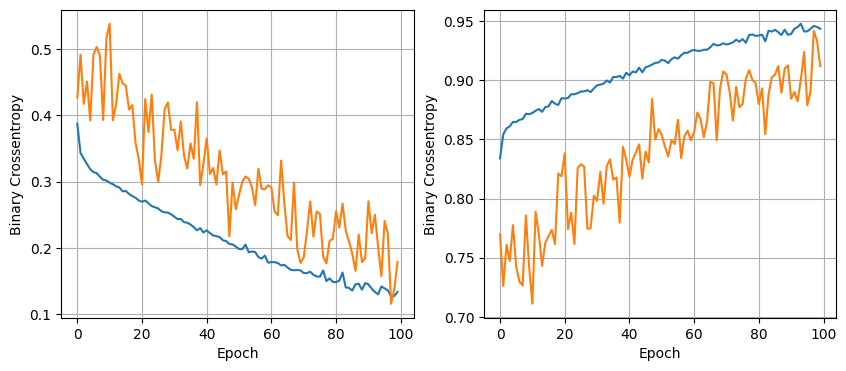

119/119 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.8520
64 nodes, dropout 0, lr 0.005, batch size 64


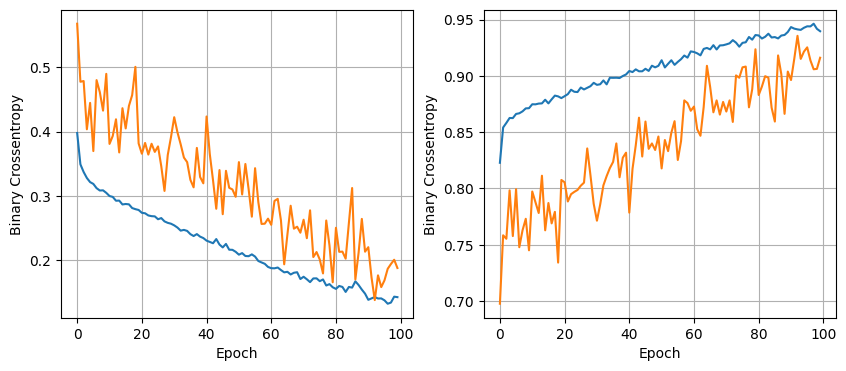

119/119 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.8528
64 nodes, dropout 0, lr 0.005, batch size 128


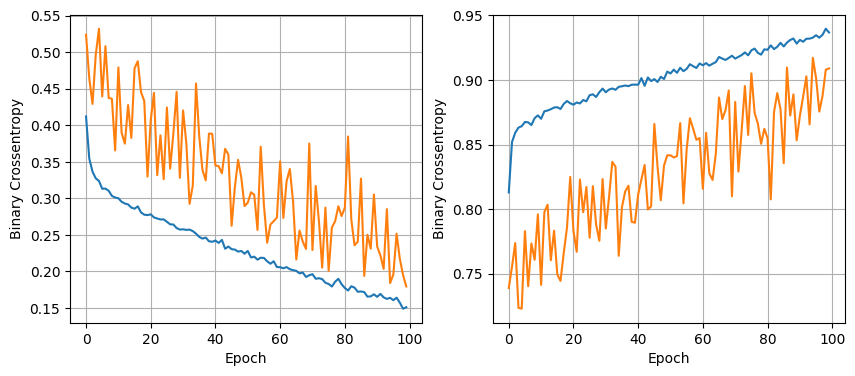

119/119 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.8594
64 nodes, dropout 0, lr 0.001, batch size 32


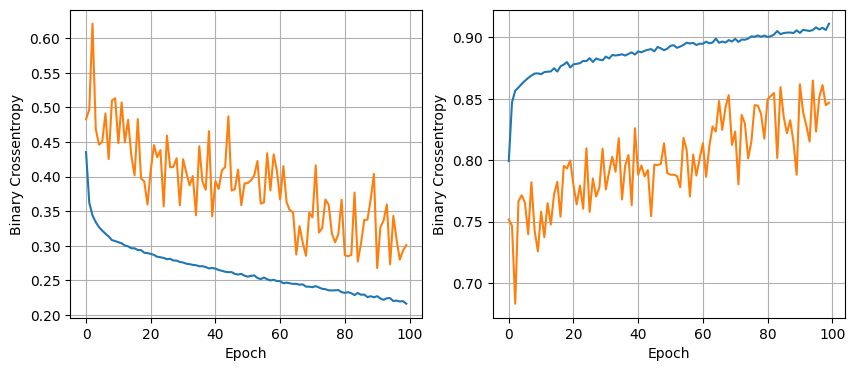

119/119 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8715
64 nodes, dropout 0, lr 0.001, batch size 64


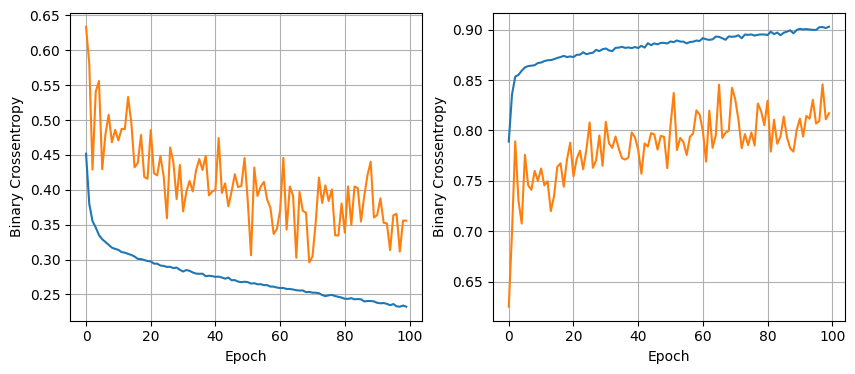

119/119 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8762
64 nodes, dropout 0, lr 0.001, batch size 128


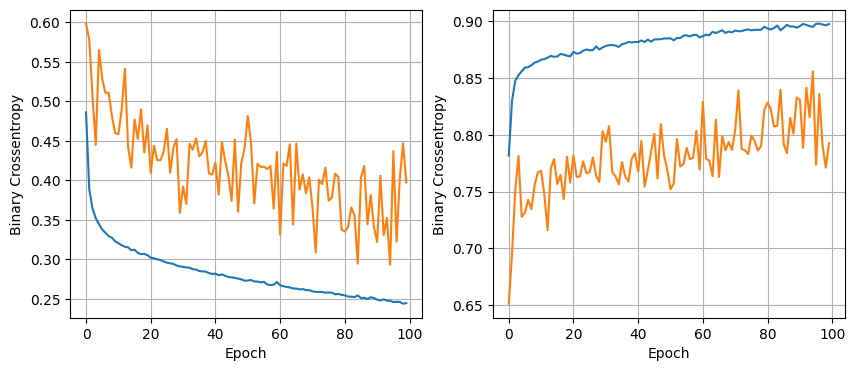

119/119 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8762
64 nodes, dropout 0.2, lr 0.01, batch size 32


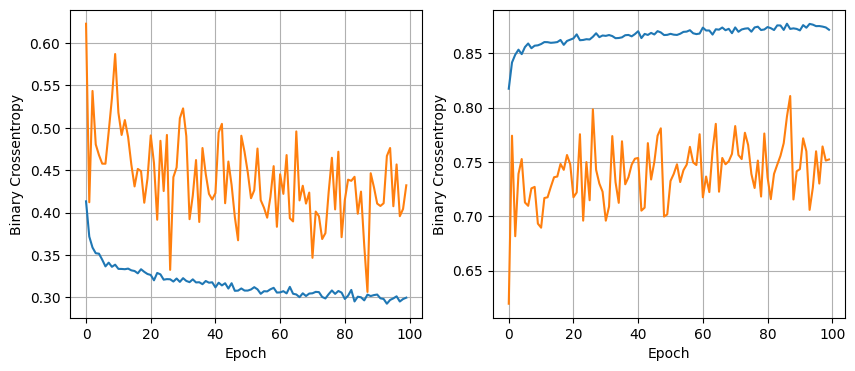

119/119 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.01, batch size 64


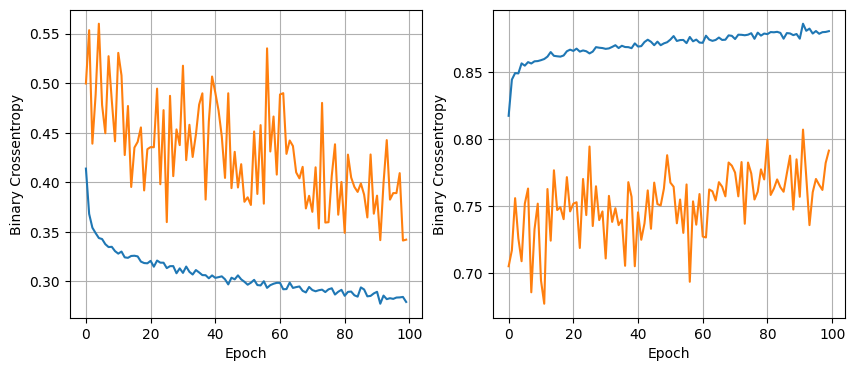

119/119 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8733
64 nodes, dropout 0.2, lr 0.01, batch size 128


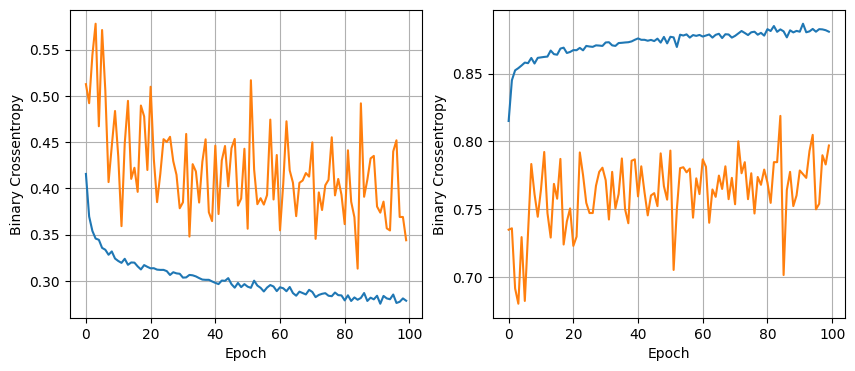

119/119 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8770
64 nodes, dropout 0.2, lr 0.005, batch size 32


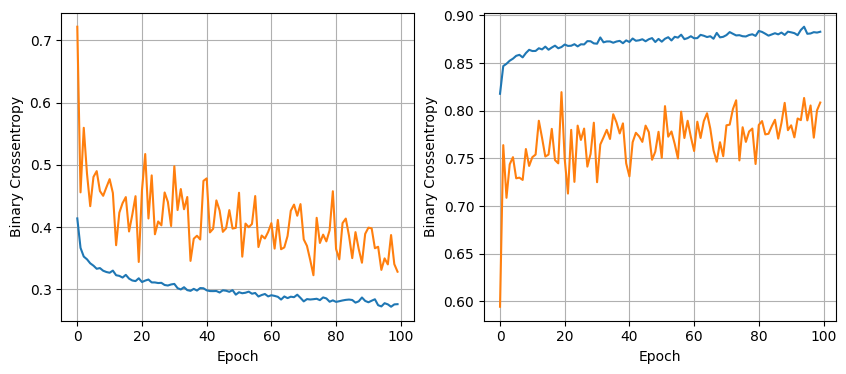

119/119 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.8767
64 nodes, dropout 0.2, lr 0.005, batch size 64


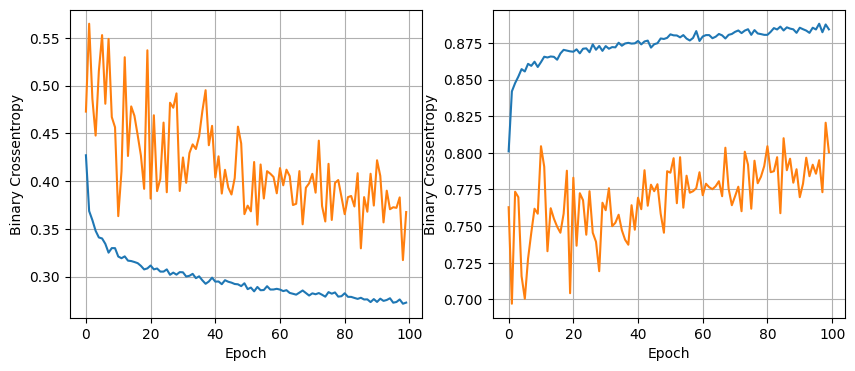

119/119 [==============================] - 0s 3ms/step - loss: 0.2925 - accuracy: 0.8770
64 nodes, dropout 0.2, lr 0.005, batch size 128


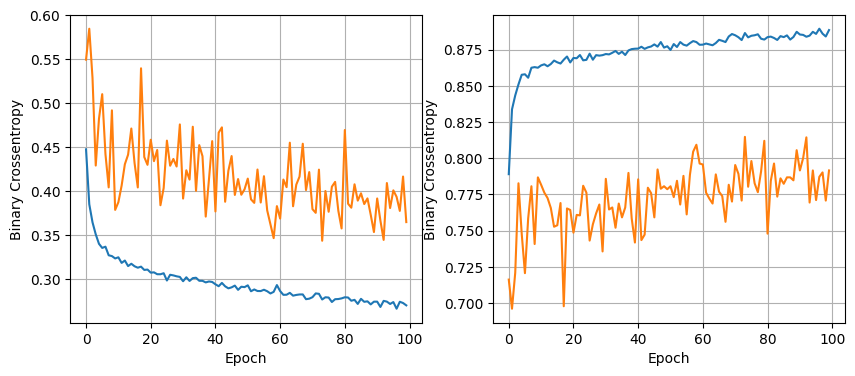

119/119 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.8770
64 nodes, dropout 0.2, lr 0.001, batch size 32


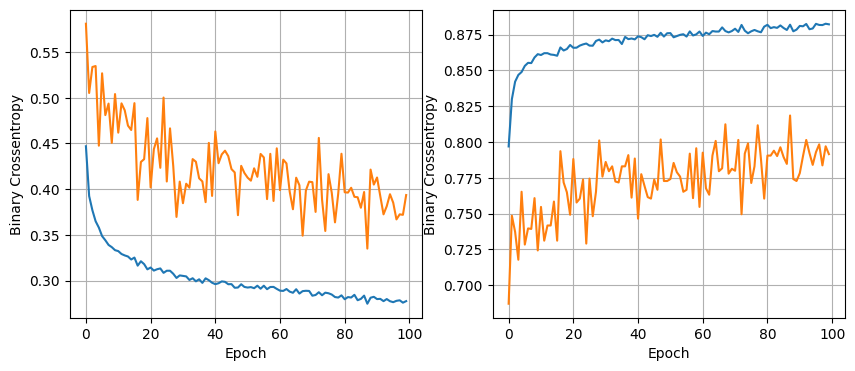

119/119 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8809
64 nodes, dropout 0.2, lr 0.001, batch size 64


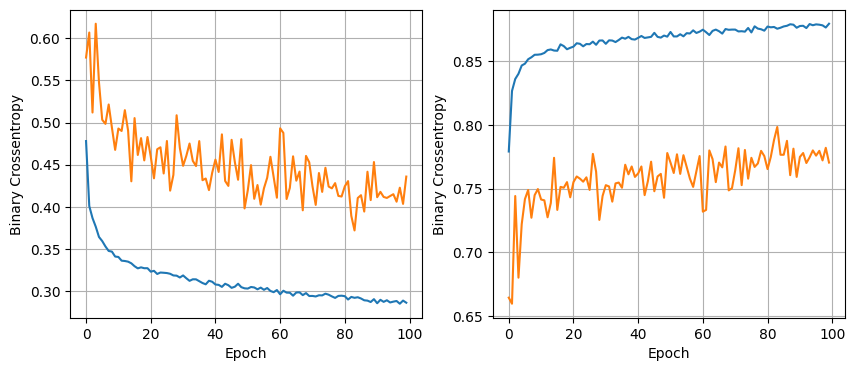

119/119 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8807
64 nodes, dropout 0.2, lr 0.001, batch size 128


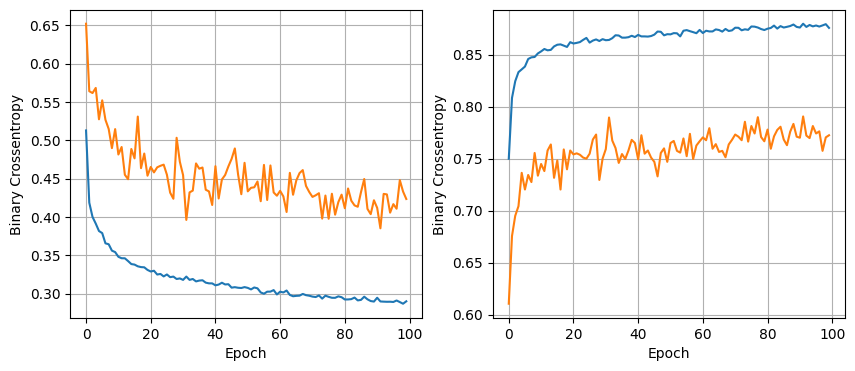

119/119 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8814


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

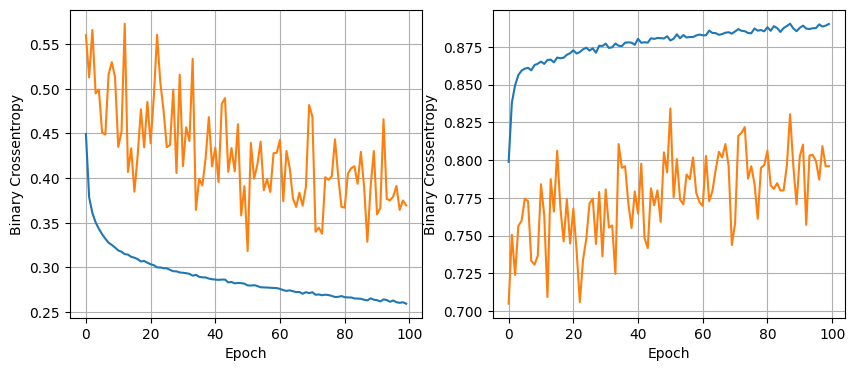

In [ ]:
plot_history(history)

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)


119/119 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1294
           1       0.88      0.95      0.91      2510

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

